# Suicide statistics in USA

This Project contains the data record of suicide data in USA in the span of year 1979 - 2015

In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [4]:
import jovian
jovian.commit(project = 'suicide-statistics-in-usa', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ipenkizal/suicide-statistics-in-usa" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ipenkizal/suicide-statistics-in-usa


'https://jovian.ai/ipenkizal/suicide-statistics-in-usa'

In [5]:
# Change this
dataset_url = 'https://www.kaggle.com/szamil/who-suicide-statistics' 

In [6]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\who-suicide-statistics" (use force=True to force download)


In [7]:
data_dir = './who-suicide-statistics'

In [8]:
import os
os.listdir(data_dir)

['who_suicide_statistics.csv']

### Importing the library we need

In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


### Importing and read the data we need

In [10]:
all_suicide_df = pd.read_csv("/Users/irfan/Jovian course/who-suicide-statistics/who_suicide_statistics.csv")


## Data preparation and cleaning

Because we are specially interested in the data about USA. We are getting this data to a separate dataframe

In [11]:
suicide_df = all_suicide_df.loc[all_suicide_df.country == 'United States of America']
suicide_df

,country,year,sex,age,suicides_no,population
41916,United States of America,1979,female,15-24 years,1001.0,21039000.0
41917,United States of America,1979,female,25-34 years,1352.0,18176000.0
41918,United States of America,1979,female,35-54 years,2458.0,24669000.0
41919,United States of America,1979,female,5-14 years,48.0,17317000.0
41920,United States of America,1979,female,55-74 years,1705.0,20097000.0
...,...,...,...,...,...,...
42367,United States of America,2016,male,25-34 years,NaN,22511217.0
42368,United States of America,2016,male,35-54 years,NaN,41481607.0
42369,United States of America,2016,male,5-14 years,NaN,21313304.0
42370,United States of America,2016,male,55-74 years,NaN,33121620.0


In [12]:
print('The dataset with data about USA has {} columns and {} rows'.format(suicide_df.shape[1],suicide_df.shape[0]))

The dataset with data about USA has 6 columns and 456 rows


### Because the all dataset in 2016 has a null datavalue. Let just remove it

In [13]:
suicide_df = suicide_df[suicide_df.year != 2016]
suicide_df.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

Checking if there is any missing value

In [14]:
len(suicide_df.year.unique())

37

In [15]:
len(suicide_df.age.unique())

6

In [16]:
len(suicide_df.year)

444

In [17]:
37 * 6 * 2

444

Coming out perfect and done with our data cleaning process for this dataset

In [18]:
import jovian

In [19]:
jovian.commit(project = 'suicide-statistics-in-usa', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ipenkizal/suicide-statistics-in-usa" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ipenkizal/suicide-statistics-in-usa


'https://jovian.ai/ipenkizal/suicide-statistics-in-usa'

# Exploratory Analysis and Visualization

In [20]:
suicide_df.sort_values(['year','age'])

,country,year,sex,age,suicides_no,population
41916,United States of America,1979,female,15-24 years,1001.0,21039000.0
41922,United States of America,1979,male,15-24 years,4245.0,21405000.0
41917,United States of America,1979,female,25-34 years,1352.0,18176000.0
41923,United States of America,1979,male,25-34 years,4505.0,17862000.0
41918,United States of America,1979,female,35-54 years,2458.0,24669000.0
...,...,...,...,...,...,...
42357,United States of America,2015,male,5-14 years,255.0,21273987.0
42352,United States of America,2015,female,55-74 years,2872.0,35115610.0
42358,United States of America,2015,male,55-74 years,9068.0,32264697.0
42353,United States of America,2015,female,75+ years,540.0,11778666.0


Lets find out the total of suicide cases throughout the years

In [22]:
total_suicide_df = round(suicide_df.pivot_table('suicides_no',['country','year'],'sex',aggfunc=np.sum))
total_suicide_df = total_suicide_df.reset_index()
total_suicide_df['cases'] = total_suicide_df.male + total_suicide_df.female
total_suicide_df

sex,country,year,female,male,cases
0,United States of America,1979,6948.0,20241.0,27189.0
1,United States of America,1980,6363.0,20489.0,26852.0
2,United States of America,1981,6783.0,20791.0,27574.0
3,United States of America,1982,6615.0,21611.0,28226.0
4,United States of America,1983,6508.0,21772.0,28280.0
5,United States of America,1984,6595.0,22672.0,29267.0
6,United States of America,1985,6308.0,23138.0,29446.0
7,United States of America,1986,6677.0,24215.0,30892.0
8,United States of America,1987,6522.0,24261.0,30783.0
9,United States of America,1988,6327.0,24061.0,30388.0


find out the total of all suicide cases

In [23]:
total_female = total_suicide_df.female.sum()
total_male = total_suicide_df.male.sum()
total_cases = total_suicide_df.cases.sum()

In [24]:
print("Total suicide cases in men is {} and women is {}".format(int(total_male),int(total_female)))
print("Total suicide cases overall is", int(total_cases))

Total suicide cases in men is 947792 and women is 253609
Total suicide cases overall is 1201401


from This above analysis we can conclude that there is more than 1 million people suicide in pas 36 years which is heartbreaking. And most of them are men.

Now let analyse the cases separately using bar graph

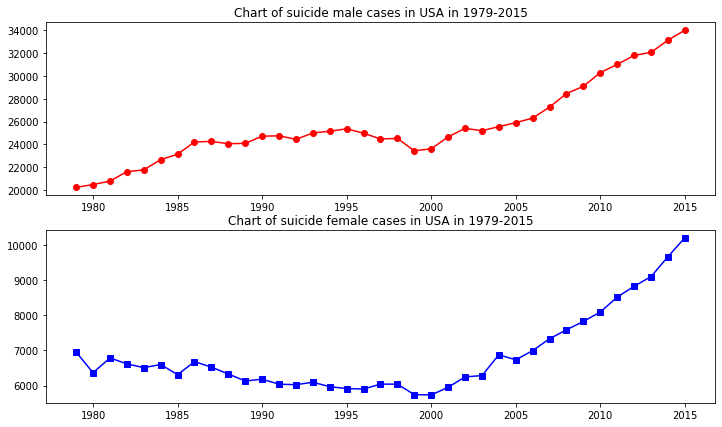

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))

axes[0].set_title("Chart of suicide male cases in USA in 1979-2015")
axes[0].plot(total_suicide_df.year, total_suicide_df.male, 'o-r')

axes[1].set_title("Chart of suicide female cases in USA in 1979-2015")
axes[1].plot(total_suicide_df.year,total_suicide_df.female, 's-b')

From the analysis above we can conclude that there is some divergence between 1985-2000 but identical in pas 10 years. Its shocking because in past 10 years the graph have significant increase which is so bad.

Grouping suicide cases based on age

In [26]:
age_suicide_df = round(suicide_df.pivot_table('suicides_no',['country','year'],'age', aggfunc = np.sum))
age_suicide_df =(age_suicide_df.reset_index())
age_suicide_df


age,country,year,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,United States of America,1979,5246.0,5857.0,7665.0,152.0,6298.0,1971.0
1,United States of America,1980,5239.0,5920.0,7558.0,142.0,6086.0,1907.0
2,United States of America,1981,5161.0,6343.0,7836.0,167.0,6163.0,1904.0
3,United States of America,1982,5025.0,6316.0,8025.0,200.0,6553.0,2107.0
4,United States of America,1983,4845.0,6338.0,7935.0,205.0,6597.0,2360.0
5,United States of America,1984,5026.0,6392.0,8250.0,232.0,6991.0,2376.0
6,United States of America,1985,5121.0,6376.0,8158.0,278.0,6870.0,2643.0
7,United States of America,1986,5120.0,6711.0,8749.0,255.0,7196.0,2861.0
8,United States of America,1987,4924.0,6655.0,8839.0,251.0,7078.0,3036.0
9,United States of America,1988,4929.0,6710.0,8737.0,243.0,6702.0,3067.0


Because the age column is not in the order, we can use pd.drop() and pd.insert() to relocate column

In [27]:
temp_age = age_suicide_df['5-14 years']
age_suicide_df = age_suicide_df.drop('5-14 years',1)
age_suicide_df.insert(loc=2, column='5-14 years', value=temp_age)
age_suicide_df

age,country,year,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
0,United States of America,1979,152.0,5246.0,5857.0,7665.0,6298.0,1971.0
1,United States of America,1980,142.0,5239.0,5920.0,7558.0,6086.0,1907.0
2,United States of America,1981,167.0,5161.0,6343.0,7836.0,6163.0,1904.0
3,United States of America,1982,200.0,5025.0,6316.0,8025.0,6553.0,2107.0
4,United States of America,1983,205.0,4845.0,6338.0,7935.0,6597.0,2360.0
5,United States of America,1984,232.0,5026.0,6392.0,8250.0,6991.0,2376.0
6,United States of America,1985,278.0,5121.0,6376.0,8158.0,6870.0,2643.0
7,United States of America,1986,255.0,5120.0,6711.0,8749.0,7196.0,2861.0
8,United States of America,1987,251.0,4924.0,6655.0,8839.0,7078.0,3036.0
9,United States of America,1988,243.0,4929.0,6710.0,8737.0,6702.0,3067.0


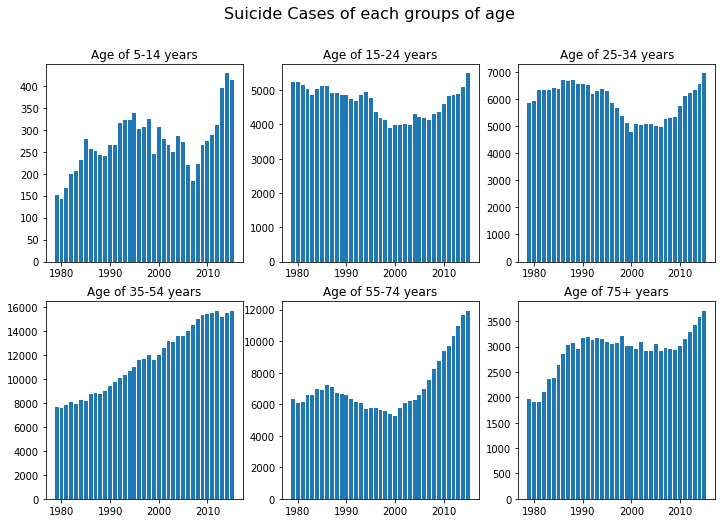

In [35]:
plt.figure(figsize = [12,8]).suptitle("Suicide Cases of each groups of age", fontsize=16)
count = 1
for column in age_suicide_df.columns[2:]:
    plt.subplot(2,3,count)
    plt.bar(age_suicide_df.year, age_suicide_df[column])
    plt.title("Age of {}".format(column))
    count += 1

#### Let see the increase of all cases over the years

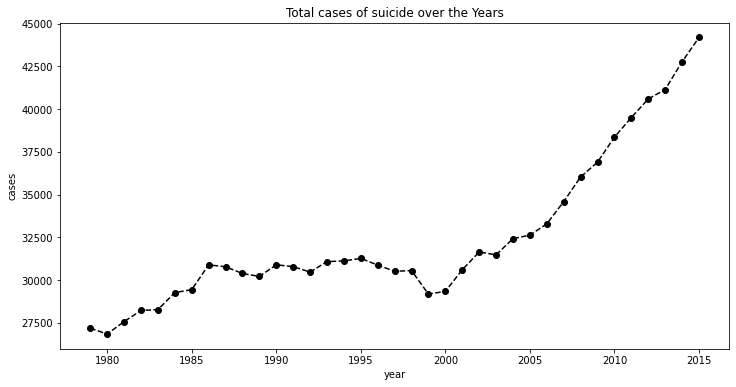

In [41]:
plt.figure(figsize = (12,6))
plt.plot(total_suicide_df.year, total_suicide_df.cases, 'o--k')
plt.title('Total cases of suicide over the Years')
plt.xlabel('year')
plt.ylabel('cases');

# There are three things to be concluded from the analysis

## 1) The cases getting worst over the years
## 2) The cases of all group age is identical
## 3) Age 55-74 have the most increase cases over the years

In [42]:
import jovian

In [43]:
jovian.commit(project = 'suicide-statistics-in-usa', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ipenkizal/suicide-statistics-in-usa" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ipenkizal/suicide-statistics-in-usa


'https://jovian.ai/ipenkizal/suicide-statistics-in-usa'

## Asking and Answering Questions

#### we've already gained several insights about the suicide cases of the dataset. Lets ask some question and try answer using the dataframe operations and visualization

### Q: Create a dataframe containing 10 highest suicide cases in USA throughout the years

In [47]:
max_suicide_cases = total_suicide_df.sort_values('cases', ascending = False).head(10)
max_suicide_cases

sex,country,year,female,male,cases
36,United States of America,2015,10199.0,33990.0,44189.0
35,United States of America,2014,9659.0,33110.0,42769.0
34,United States of America,2013,9094.0,32049.0,41143.0
33,United States of America,2012,8819.0,31777.0,40596.0
32,United States of America,2011,8512.0,30996.0,39508.0
31,United States of America,2010,8087.0,30275.0,38362.0
30,United States of America,2009,7821.0,29079.0,36900.0
29,United States of America,2008,7583.0,28447.0,36030.0
28,United States of America,2007,7329.0,27267.0,34596.0
27,United States of America,2006,6992.0,26300.0,33292.0


we see from the analysis that the highest suicide cases reported is in sequence of past 10 years

### Q. Create a dataframe containing 10 highest suicide male and female cases in USA throughout the years

In [49]:
max_male_suicide_cases = total_suicide_df.sort_values('male', ascending = False).head(10)
max_male_suicide_cases

sex,country,year,female,male,cases
36,United States of America,2015,10199.0,33990.0,44189.0
35,United States of America,2014,9659.0,33110.0,42769.0
34,United States of America,2013,9094.0,32049.0,41143.0
33,United States of America,2012,8819.0,31777.0,40596.0
32,United States of America,2011,8512.0,30996.0,39508.0
31,United States of America,2010,8087.0,30275.0,38362.0
30,United States of America,2009,7821.0,29079.0,36900.0
29,United States of America,2008,7583.0,28447.0,36030.0
28,United States of America,2007,7329.0,27267.0,34596.0
27,United States of America,2006,6992.0,26300.0,33292.0


In [50]:
max_female_suicide_cases = total_suicide_df.sort_values('female', ascending = False).head(10)
max_female_suicide_cases

sex,country,year,female,male,cases
36,United States of America,2015,10199.0,33990.0,44189.0
35,United States of America,2014,9659.0,33110.0,42769.0
34,United States of America,2013,9094.0,32049.0,41143.0
33,United States of America,2012,8819.0,31777.0,40596.0
32,United States of America,2011,8512.0,30996.0,39508.0
31,United States of America,2010,8087.0,30275.0,38362.0
30,United States of America,2009,7821.0,29079.0,36900.0
29,United States of America,2008,7583.0,28447.0,36030.0
28,United States of America,2007,7329.0,27267.0,34596.0
27,United States of America,2006,6992.0,26300.0,33292.0


### Q. The number suicide cases based on group age

In [56]:
total_suicide_each_age = age_suicide_df.iloc[:,2:].sum()
total_suicide_each_age

age
5-14 years      10021.0
15-24 years    172221.0
25-34 years    219213.0
35-54 years    428186.0
55-74 years    263458.0
75+ years      108302.0
dtype: float64

Age 35 - 54 has the most suicide cases throughout the years

### Q. The average of suicide cases over the years

In [58]:
average_cases = total_suicide_df.cases.mean()
average_cases

32470.297297297297

In [59]:
print("The average of suicide cases over the years is {:.2f}".format(average_cases) )

The average of suicide cases over the years is 32470.30


In [60]:
jovian.commit(project = 'suicide-statistics-in-usa', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ipenkizal/suicide-statistics-in-usa" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ipenkizal/suicide-statistics-in-usa


'https://jovian.ai/ipenkizal/suicide-statistics-in-usa'

# Inferences and Conclusion

### The purpose of the project was to analyse the situation of suicide cases in the year 1979 -2015 (36 years)

### From the analysis that we do , we have some conclusion

1) Total suicide cases in men is 947792 and women is 253609

2) More than 1 million people suicide in past 36 years

3) We summarised that the suicide cases is significantly increasing over the years which is bad

4) We found that suicide cases mostly are men in the age of 35-54 years

# References and Future Work

### References

#### Check out the following resources :

    1) WHO suicide statistics dataset in Kaggle : https://www.kaggle.com/szamil/who-suicide-statistics
    
    2) Pandas user guide :  https://pandas.pydata.org/docs/user_guide/index.html
    
    3) The answer of my questions : https://stackoverflow.com
    
    4) Coding tutorial : https://www.geeksforgeeks.org/
    
    5) matplotlib user guide : https://matplotlib.org/3.3.1/users/index.html
    
### Future work
There are a lot of improvements we can make to our project in the future. We can enhance it by using a dataset from around the world not just USA and can dig deep more analysis again
    

In [61]:
import jovian

In [62]:
jovian.commit(project='suicide-statistics-in-usa', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ipenkizal/suicide-statistics-in-usa" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/ipenkizal/suicide-statistics-in-usa


'https://jovian.ai/ipenkizal/suicide-statistics-in-usa'